In [1]:
from torchvision.models import resnet18

model = resnet18(weights='DEFAULT')

/home/marco/.cache/pypoetry/virtualenvs/torch-mist-77TFSLfY-py3.9/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from torch import nn
import torch

class ResNet18Encoder(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.resnet = resnet18(**kwargs)

    def forward(self, x):
        x = self.resnet.conv1(x)
        x = self.resnet.bn1(x)
        x = self.resnet.relu(x)
        x = self.resnet.maxpool(x)

        x = self.resnet.layer1(x)
        x = self.resnet.layer2(x)
        x = self.resnet.layer3(x)
        x = self.resnet.layer4(x)

        x = self.resnet.avgpool(x)
        x = torch.flatten(x, 1)
        return x

In [15]:
from torch_mist.utils.freeze import freeze
encoder = ResNet18Encoder(weights='DEFAULT')
freeze(encoder)

In [4]:
from torchvision.datasets import CelebA
from torchvision.transforms import ToTensor

def filter_landmarks(landmarks):
    landmarks = landmarks[:4].float()
    return landmarks    
    

dataset = CelebA('/data', target_type='landmarks', target_transform=filter_landmarks, transform=ToTensor())

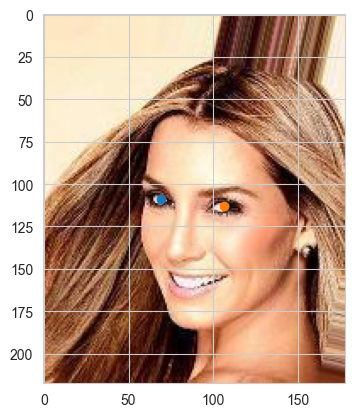

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

image, landmarks = dataset[0]
plt.imshow(image.permute(1,2,0))

plt.plot(landmarks[0], landmarks[1], 'o')
plt.plot(landmarks[2], landmarks[3], 'o')

In [6]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=128,
    num_workers=8
)

In [7]:
for x, y in dataloader:
    break

In [23]:
from torch_mist.utils import train_mi_estimator
from torch_mist.estimators import js, TransformedMIEstimator

x_dim = 512
y_dim = 4
device = 'cuda'

mi_estimator = TransformedMIEstimator(
    transforms={'x': encoder},
    base_estimator=js(
        x_dim=x_dim,
        y_dim=y_dim,
        neg_samples=32,
        hidden_dims=[128, 64]
    )
)

log =train_mi_estimator(
    estimator=mi_estimator,
    train_loader=dataloader,
    max_epochs=10,
    verbose=True,
    device=device,
)



AssertionError: Torch not compiled with CUDA enabled

In [16]:
for batch in dataloader:
    break

In [20]:
encoder(batch[0]).shape, batch[1].shape

(torch.Size([128, 512]), torch.Size([128, 4]))